In [2]:
import pandas as pd

df = pd.read_csv('cambodia_education_2020_2021.csv')
df

,Province,Schools,Total Enrolment,Girls Enrolled,Total Repeaters,Girls Repeating,Total Teachers,Female Teachers,% Girls Enrolled,% Female Teachers,% Girls Repeating
0,Kampong Chhnang,472,117538,59843,6008,1986,3532,1719,50.91,48.67,33.06
1,Kandal,756,258461,127877,14548,5131,7345,4118,49.48,56.07,35.27
2,Phnom Penh,381,242175,118392,5601,2039,9294,5377,48.89,57.85,36.40
3,Prey Veng,1063,239206,117724,10476,3699,5762,2753,49.21,47.78,35.31
4,Svay Rieng,509,119640,59271,3372,1135,3686,1443,49.54,39.15,33.66
5,Kampong Speu,625,166343,82765,5690,2201,4322,1962,49.76,45.40,38.68
6,Kampot,612,127618,62743,4102,1376,4671,2322,49.16,49.71,33.54
7,Koh Kong,223,27262,13349,739,291,1157,547,48.97,47.28,39.38
8,Preah Sihanouk,158,42971,21414,1531,571,1650,841,49.83,50.97,37.30
9,Takeo,799,199945,98992,10440,3598,6433,2658,49.51,41.32,34.46


In [3]:
print(df.head())

          Province  Schools  Total Enrolment  Girls Enrolled  Total Repeaters  \
0  Kampong Chhnang      472           117538           59843             6008   
1           Kandal      756           258461          127877            14548   
2       Phnom Penh      381           242175          118392             5601   
3        Prey Veng     1063           239206          117724            10476   
4       Svay Rieng      509           119640           59271             3372   

   Girls Repeating  Total Teachers  Female Teachers  % Girls Enrolled  \
0             1986            3532             1719             50.91   
1             5131            7345             4118             49.48   
2             2039            9294             5377             48.89   
3             3699            5762             2753             49.21   
4             1135            3686             1443             49.54   

   % Female Teachers  % Girls Repeating  
0              48.67            

In [4]:
print(df.isnull().sum())

Province             0
Schools              0
Total Enrolment      0
Girls Enrolled       0
Total Repeaters      0
Girls Repeating      0
Total Teachers       0
Female Teachers      0
% Girls Enrolled     0
% Female Teachers    0
% Girls Repeating    0
dtype: int64


In [5]:
#Explore the Data
numeric_df = df.select_dtypes(include=['float64', 'int64'])

import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(df.describe())

           Schools  Total Enrolment  Girls Enrolled  Total Repeaters  \
count    25.000000        25.000000       25.000000         25.00000   
mean    543.880000    128939.000000    64282.840000       5821.28000   
std     317.964925     86676.509069    43101.166296       4378.64953   
min      50.000000      8966.000000     4478.000000        318.00000   
25%     319.000000     55554.000000    27171.000000       3131.00000   
50%     509.000000    119640.000000    59843.000000       5469.00000   
75%     795.000000    199945.000000    98992.000000       7381.00000   
max    1164.000000    273052.000000   138304.000000      15094.00000   

       Girls Repeating  Total Teachers  Female Teachers  % Girls Enrolled  \
count        25.000000       25.000000        25.000000         25.000000   
mean       2085.800000     3758.240000      1991.880000         49.926400   
std        1533.659078     2389.459445      1375.875428          0.677814   
min         106.000000      474.000000     

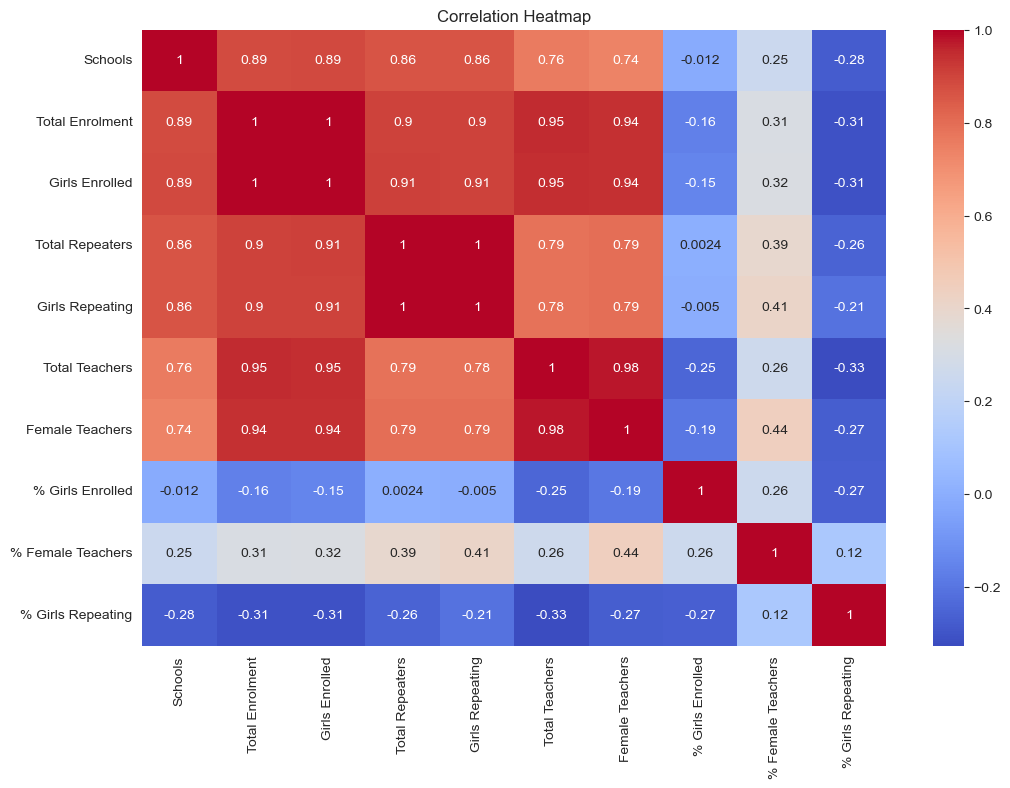

In [6]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

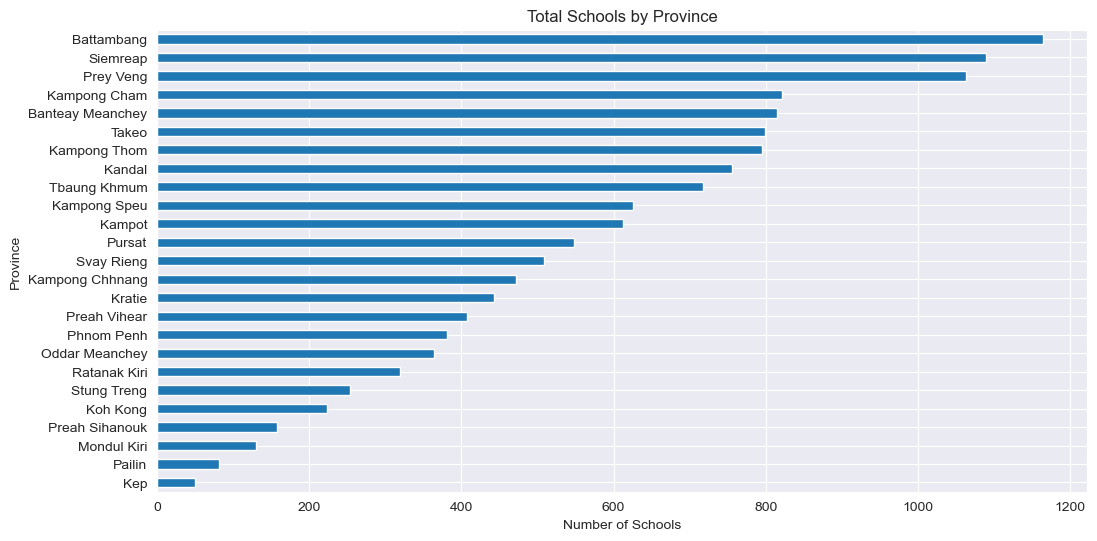

In [7]:
# Bar chart of number of school per province
plt.figure(figsize=(12, 6))
df.groupby('Province')['Schools'].sum().sort_values().plot(kind='barh')
plt.title('Total Schools by Province')
plt.xlabel('Number of Schools')
plt.ylabel('Province')
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode Province as numeric
df['Province'] = LabelEncoder().fit_transform(df['Province'])

# Drop rows with missing values (if any)
df = df.dropna()

# Select features and target
features = ['Province', 'Schools', 'Total Enrolment', 'Total Teachers', 'Female Teachers']
target = '% Girls Enrolled'

X = df[features]
y = df[target]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)


In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
accuracy = 100 * (1 - (mae / np.mean(y_test)))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Mean Absolute Error (MAE): 0.79
Mean Squared Error (MSE): 0.83
R² Score: -0.26
Accuracy: 98.43


In [14]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
results_df.to_csv("predicted_education_output.csv", index=False)
print("Predictions saved to predicted_education_output.csv")


Predictions saved to predicted_education_output.csv


In [15]:
# Predict using the test set
predictions_df = pd.read_csv('predicted_education_output.csv')
predictions_df

,Actual,Predicted
0,49.83,49.898297
1,51.15,50.082914
2,50.91,49.730299
3,48.91,50.118126
4,49.84,50.258826


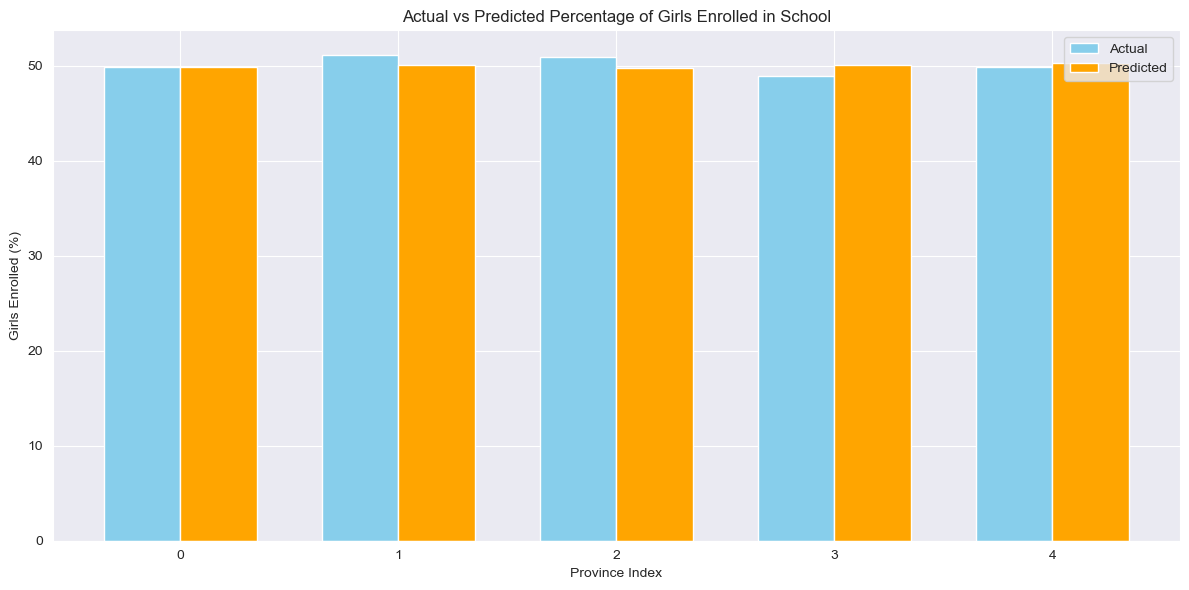

In [16]:
import numpy as np

# Load the saved prediction results
df = pd.read_csv('predicted_education_output.csv')

# Create a range of positions for bar plots
indices = np.arange(len(df))

# Set the width of each bar
width = 0.35

# Create the plot
plt.figure(figsize=(12, 6))
plt.bar(indices, df['Actual'], width=width, label='Actual', color='skyblue')
plt.bar(indices + width, df['Predicted'], width=width, label='Predicted', color='orange')

# Add labels and title
plt.xlabel('Province Index')
plt.ylabel('Girls Enrolled (%)')
plt.title('Actual vs Predicted Percentage of Girls Enrolled in School')
plt.legend()

# Set x-ticks positions and labels
plt.xticks(indices + width / 2, indices)

# Show the plot
plt.tight_layout()
plt.show()